# Testing a baseline model

## Loading a model

In [1]:
import tensorflow as tf

In [2]:
import tensorflow
vgg_model = tensorflow.keras.applications.vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    vgg_model.layers + 
    [
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)

In [4]:
assert model.count_params() == 17926209

In [5]:
vgg_model.trainable=False

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

## Loading latest checkpoint 

In [7]:
import os
checkpoint_path = "training_1/checkpoint"
checkpoint_dir = os.path.dirname(checkpoint_path)
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index', 'model.pkl']

In [8]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_1\\cp.ckpt'

In [9]:
# Load the previously saved weights
model.load_weights(latest)

In [10]:
# import pickle
# filename = 'training_1\\model.pkl'
# loaded_model = pickle.load(open(filename, 'rb'))

## Testing the model on test data

In [22]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def evaluate(img_fname):
    img = image.load_img(img_fname, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    pred = model.predict(x)[0][0]
    pred_class = 'good' if pred > 0.5 else 'bad'
    pred = pred if pred_class == 'good' else 1 - pred
    print('Predicted:', pred_class, 'with prediction (confidence) of ' + str(round(pred, 3)))
    plt.imshow(img)
    plt.show()

Predicted: bad with prediction (confidence) of 0.823


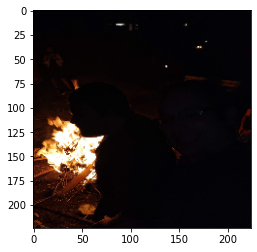

Predicted: bad with prediction (confidence) of 0.839


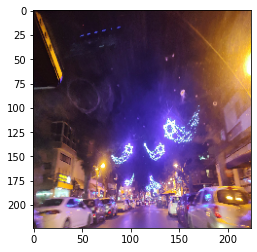

Predicted: good with prediction (confidence) of 1.0


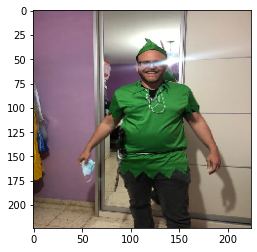

Predicted: bad with prediction (confidence) of 0.839


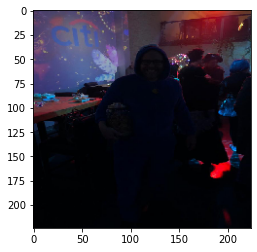

Predicted: bad with prediction (confidence) of 0.839


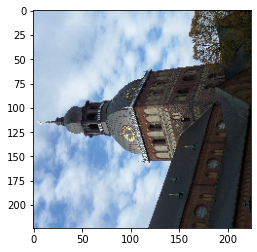

Predicted: good with prediction (confidence) of 0.999


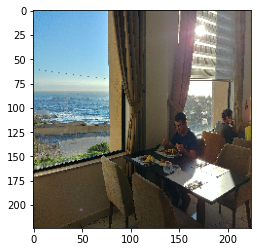

Predicted: good with prediction (confidence) of 0.999


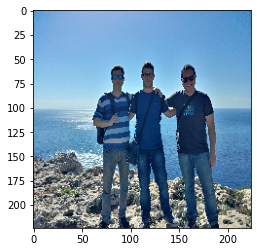

Predicted: good with prediction (confidence) of 0.971


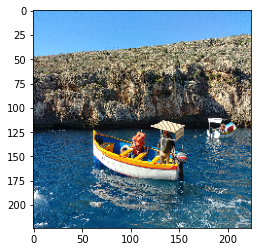

Predicted: good with prediction (confidence) of 0.993


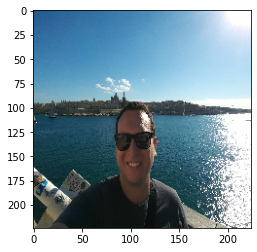

Predicted: good with prediction (confidence) of 1.0


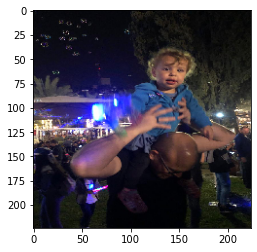

Predicted: bad with prediction (confidence) of 0.839


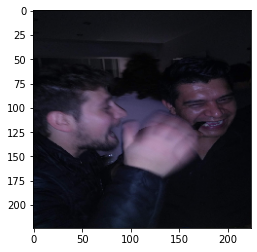

Predicted: good with prediction (confidence) of 0.957


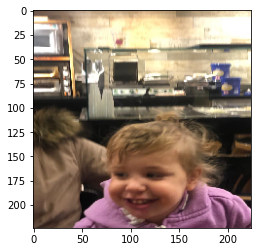

Predicted: good with prediction (confidence) of 1.0


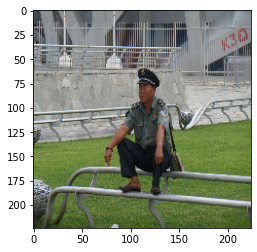

Predicted: bad with prediction (confidence) of 0.839


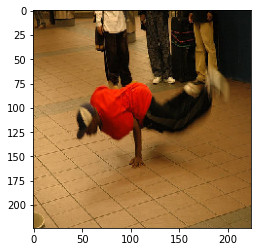

Predicted: bad with prediction (confidence) of 0.575


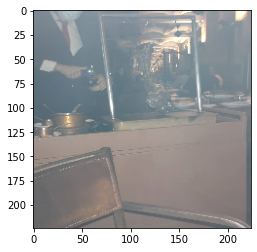

Predicted: bad with prediction (confidence) of 0.839


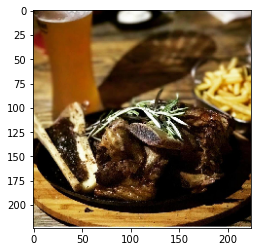

Predicted: bad with prediction (confidence) of 0.586


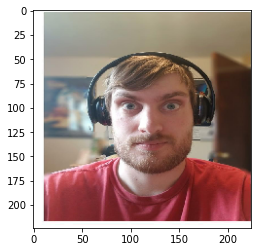

Predicted: good with prediction (confidence) of 0.643


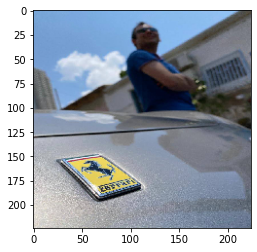

Predicted: bad with prediction (confidence) of 0.839


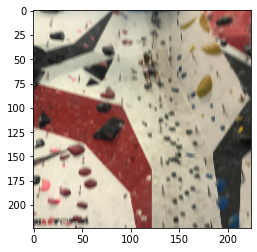

Predicted: bad with prediction (confidence) of 0.839


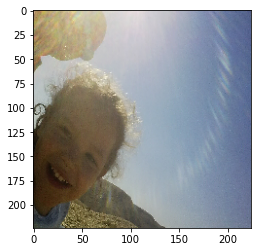

In [24]:
for filename in os.listdir('test\\'):
    evaluate('test\\' + filename)